# Лабораторная работа №1 по курсу "Искусственный интеллект - Машинное обучение"

| Студент | Ильин И.О. |
|---------|--------|
| Группа  | М8О-406Б-19      |

## Задача
Формально говоря вам предстоит сделать следующее:

1) реализовать следующие алгоритмы машинного обучения: Linear/Logistic Regression, SVM, KNN, Naive Bayes в отдельных классах.

2)  Данные классы должны наследоваться от BaseEstimator и  ClassifierMixin, иметь методы fit и predict (подробнее: https://scikit-learn.org/stable/developers/develop.html).

3) Вы должны организовать весь процесс предобработки, обучения и тестирования с помощью Pipeline (подробнее: https://scikit-learn.org/stable/modules/compose.html).

4) Вы должны настроить гиперпараметры моделей с помощью кросс валидации (GridSearchCV,RandomSearchCV, подробнее здесь: https://scikit-learn.org/stable/modules/grid_search.html), вывести и сохранить эти гиперпараметры в файл, вместе с обученными моделями.

5) Проделать аналогично с коробочными решениями.

6) Для каждой модели получить оценки метрик:Confusion Matrix,  Accuracy, Recall, Precision, ROC_AUC curve (подробнее: Hands on machine learning with python and scikit learn chapter 3, mlcourse.ai, https://ml-handbook.ru/chapters/model_evaluation/intro).

7) Проанализировать полученные результаты и сделать выводы о применимости моделей.

8) Загрузить полученные гиперпараметры модели и обученные модели в формате pickle  на гит вместе с jupyter notebook ваших экспериментов.

## Настройка среды

Загрузим все необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Описание входных данных:**
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

• id – id апартаментов.

• name – название апартаментов.

• host ID – id хозяина.

• host_name – имя хозяина.

• neighbourhood_group – район нью йорка.

• neighbourhood – окрестность.

• latitude – широта.

• longitude – долгота.

• room_type – тип апартаментов.

• price – цена апартаментов.

• minimum_nights – минимальное кол-во ночей.

• number_of_reviews – количество отзывов.

• last_review – дата последнего отзыва.

• reviews_per_month – количество отзывов за месяц.

• calculated_host_listings_count – количество записей на аппартаменты.

• availability_365 – количество дней, когда аппартаменты доступно для бронирования.

**Типы признаков:**

• Категориальные

– name

– host_name

– neighbourhood_group

– neighbourhood

– room_type

– last_review

• Количественные

– id

– host_id

– latitude

– longitude

– price

– number_of_reviews

– reviews_per_month

– calculated_host_listings_count

– availability_365

**Размер:**

• Строк: 48895

• Столбцов: 16

**Решаемая задача:**

Задача классификации: классификация на дешевый/дорогой price.

Добавим столбец target классификации по средней цене, если цена апартаментов больше или равна средней то, будем считать, что это высокая цена и добавим 1 в строке с апартаментами в столбец target, иначе 0.

Загрузим уже предобработанные данные из нулевой лабораторной работы:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nice_price.csv')

In [4]:
data.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,group_0,group_1,group_2,group_3,group_4,room_0,room_1,room_2,target
0,-1.493849,-0.437652,-0.293996,-0.320414,-0.776641,-0.034716,1.916250,0.012762,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-1.040134,1.090893,-0.155887,0
1,0.452436,-0.684639,-0.293996,0.487665,-0.663138,-0.156104,1.840275,0.289156,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887,1
2,1.468399,0.222497,-0.196484,-0.522433,0.000000,-0.186451,1.916250,-0.190897,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-1.040134,1.090893,-0.155887,0
3,-0.803398,-0.164450,-0.293996,5.538156,2.181110,-0.186451,0.617065,-0.961892,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,0.961415,-0.916680,-0.155887,0
4,1.275660,0.177216,0.144807,-0.320414,-0.850084,-0.186451,-0.856865,-0.670950,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   minimum_nights                  48895 non-null  float64
 3   number_of_reviews               48895 non-null  float64
 4   reviews_per_month               48895 non-null  float64
 5   calculated_host_listings_count  48895 non-null  float64
 6   availability_365                48895 non-null  float64
 7   neighbourhood                   48895 non-null  float64
 8   group_0                         48895 non-null  float64
 9   group_1                         48895 non-null  float64
 10  group_2                         48895 non-null  float64
 11  group_3                         48895 non-null  float64
 12  group_4                         

In [6]:
X = data.drop('target', axis = 1)
Y = data['target'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [8]:
data_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,group_0,group_1,group_2,group_3,group_4,room_0,room_1,room_2
21681,-0.676494,4.478474,-0.245240,0.936597,0.638807,-0.186451,1.141298,-1.136456,-0.151071,-0.835628,-0.891833,2.762163,-0.087677,0.961415,-0.916680,-0.155887
26482,-1.253429,-0.918194,-0.245240,0.016286,-0.149037,-0.186451,-0.765694,1.205621,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,0.961415,-0.916680,-0.155887
20859,0.244292,-0.479900,-0.098973,-0.477540,-0.870114,-0.186451,-0.856865,0.070950,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-1.040134,1.090893,-0.155887
45464,-0.773689,0.135185,-0.293996,-0.432647,0.992668,-0.125757,-0.856865,-1.369209,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-1.040134,1.090893,-0.155887
22583,0.571821,-0.292276,-0.196484,-0.387753,-0.756611,-0.186451,-0.856865,0.289156,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-1.040134,-0.916680,6.414894


In [9]:
data_train = data_train.to_numpy()
data_test = data_test.to_numpy() 

In [10]:
data_train[0]

array([-0.67649377,  4.4784737 , -0.24524031,  0.93659743,  0.63880653,
       -0.18645145,  1.14129765, -1.13645639, -0.15107071, -0.83562777,
       -0.89183299,  2.76216304, -0.08767688,  0.96141466, -0.91668021,
       -0.15588723])

In [11]:
target_train

array([1, 0, 0, ..., 0, 0, 0])

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## Linear Regression (Линейная регрессия)

In [13]:
from sklearn.linear_model import LinearRegression

Линейная реграссия с испольованием аналитических формул:

In [14]:
class LinearRegressionClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        return self
        
    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        y_pred = X @ self.w
        return np.where(y_pred > 0, 1, 0)
    
    def get_weights(self):
        return self.w

In [15]:
classifier = LinearRegression()
classifier.fit(data_train, target_train)
y_pred = classifier.predict(data_test)
print(min(y_pred), max(y_pred))
y_pred = np.where(y_pred >= 0, 1, 0)
print("Accuracy:", accuracy_score(target_test, y_pred))

-0.3873137576180189 1.0515142166119398
Accuracy: 0.45735905651373643


In [16]:
my_classifier = LinearRegressionClassifier(fit_intercept = False)
my_classifier.fit(data_train, target_train)
y_pred = my_classifier.predict(data_test)
print(min(y_pred), max(y_pred))
print("Accuracy:", accuracy_score(target_test, y_pred))

0 1
Accuracy: 0.7322925898152567


## Logistic Regression (Логистическая регрессия)

In [17]:
class LogisticRegressionClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, lr = 0.05, max_iters = 2500, fit_intercept = True):
        self.fit_intercept = fit_intercept
        self.lr = lr
        self.max_iters = max_iters

    def fit(self, X, Y):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.X = X        
        self.Y = Y
        for i in range(self.max_iters):
            self.update_weights()
        return self

    def update_weights(self):
        z = self.X.dot(self.W)
        a = 1 / (1 + np.exp(-z))
        grad = (a - self.Y.T)
        grad = np.reshape(grad, self.m)
        dW = np.dot(self.X.T, grad) / self.m
        db = np.sum(grad) / self.m
        self.W = self.W - self.lr * dW

        return self

    def predict(self, X) :
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        z = X.dot(self.W)
        z = 1 / ( 1 + np.exp(-z))
        y = np.where(z > 0.5, 1, 0)
        return y

In [18]:
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(data_train, target_train)
y_pred = classifier.predict(data_test)
print("Accuracy:", accuracy_score(target_test, y_pred))

Accuracy: 0.798145749539846


In [19]:
my_classifier = LogisticRegressionClassifier()
my_classifier.fit(data_train, target_train)
y_pred = my_classifier.predict(data_test)
print("Accuracy:", accuracy_score(target_test, y_pred))

Accuracy: 0.7980775785670462


## SVM (Метод опорных векторов)

In [20]:
class SVMClassifier(ClassifierMixin, BaseEstimator):
    def __init__(self, epoches = 200, lr = 0.005, alpha = 0.01, fit_intercept = True):
        self.epoches = epoches
        self.lr = lr
        self.alpha = alpha
        self.fit_intercept = fit_intercept

    def update_weights(self):
        z = np.dot(self.X, self.W)
        dz = self.alpha * self.W
        for i, z_i in enumerate(z):
            if z_i * self.Y[i] < 1:
                dz -= self.X[i] * self.Y[i]
        self.W -= self.lr * dz

    def fit(self, X, y):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.m, self.n = X.shape
        self.X = X
        self.Y = y
        self.W = np.zeros(self.n)

        for _ in range(self.epoches):
            self.update_weights()
        return self

    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((X, np.ones((X.shape[0], 1))))
        return np.sign(np.dot(X, self.W))

In [21]:
classifier = SVC(kernel = "linear")
classifier.fit(data_train, target_train)
y_pred = classifier.predict(data_test)
print("Accuracy:", accuracy_score(target_test, y_pred))

Accuracy: 0.7877837616742791


In [22]:
my_classifier = SVMClassifier()
my_classifier.fit(data_train, np.where(target_train > 0, 1, -1))
y_pred = my_classifier.predict(data_test)
y_pred = np.where(y_pred > 0, 1, 0)
print("Accuracy:", accuracy_score(target_test, y_pred))

Accuracy: 0.6592133069738905


## KNN (Метод k-ближайших соседей)

In [23]:
from sklearn.metrics import euclidean_distances
class KNNClassifier(ClassifierMixin, BaseEstimator):
    def __init__(self, nb = 5):
        self.nb = nb

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        y = np.ndarray((X.shape[0],))
        for i, elem in enumerate(X):
            distances = euclidean_distances([elem], self.X_)[0]
            neighbors = np.argpartition(distances, kth = self.nb - 1)
            k_neighbors = neighbors[:self.nb]
            labels, cnts = np.unique(self.y_[k_neighbors], return_counts = True)
            y[i] = labels[cnts.argmax()]
        return y

In [24]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(data_train, target_train)
y_pred = classifier.predict(data_test)
print("Accuracy:", accuracy_score(target_test, y_pred))

Accuracy: 0.8087804212966119


In [25]:
my_classifier = KNNClassifier(nb = 5)
my_classifier.fit(data_train, target_train)
y_pred = my_classifier.predict(data_test)
print("Accuracy:", accuracy_score(target_test, y_pred))

Accuracy: 0.8087804212966119


## Naive Bayes (Наивный байесовский классификатор)

In [26]:
import math
class NaiveBayesClassifier(ClassifierMixin, BaseEstimator):
    def __init__(self):
       pass

    def fit(self, X, y):
        self.X = X
        self.y = y
        labels, counts = np.unique(self.y, return_counts = True)
        self.labels = labels
        self.freq = np.array([i / self.y.shape[0] for i in counts])
        self.means = np.array([self.X[self.y == i].mean(axis = 0) for i in labels])
        self.stds = np.array([self.X[self.y == i].std(axis = 0) for i in labels])
        return self

    def gaussian(self, mu, sigma, x0):
        return np.exp(-(x0 - mu) ** 2 / (2 * sigma)) / np.sqrt(2.0 * math.pi * sigma)

    def predict(self, X):        
        res = np.zeros(X.shape[0])
        for i, x_i  in enumerate(X):
            freq = np.array(self.freq)
            for j, label_j in enumerate(self.labels):
                p_x_cond_y = np.array([self.gaussian(self.means[j][k], self.stds[j][k], x_i[k]) for k in range(X.shape[1])])
                freq[j] *= np.prod(p_x_cond_y)
            res[i] = np.argmax(freq)
        return res

In [27]:
classifier = GaussianNB()
classifier.fit(data_train, target_train)
y_pred = classifier.predict(data_test)
print("Accuracy:", accuracy_score(target_test, y_pred))

Accuracy: 0.7535619333287886


In [28]:
my_classifier = NaiveBayesClassifier()
my_classifier.fit(data_train, target_train)
y_pred = my_classifier.predict(data_test)
print("Accuracy:", accuracy_score(target_test, y_pred))

Accuracy: 0.7633785534119572


##  Подбор параметов

Будем использовать Pipeline и GridSearchCV для поиска оптимальных параметров:

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pickle

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, RocCurveDisplay, ConfusionMatrixDisplay

def scores(y_pred1, y_pred2, y):
    print("Accuracy:", accuracy_score(y, y_pred1))
    print("Accuracy sklearn model:", accuracy_score(y, y_pred2))
    print("Recall:", recall_score(y, y_pred1))
    print("Recall sklearn model:", accuracy_score(y, y_pred2))
    print("Precision:", precision_score(y, y_pred))
    print("Precision sklearn model:", accuracy_score(y, y_pred2))
    figure = plt.figure(figsize = (20, 5))
    matr1 = confusion_matrix(y, y_pred1)
    matr2 = confusion_matrix(y, y_pred2)
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    ax1.set_title("My implementation")
    ax2.set_title("Scikit-learn implementation")
    ConfusionMatrixDisplay(matr1).plot(ax = ax1)
    ConfusionMatrixDisplay(matr2).plot(ax = ax2)
    plt.show()

### Linear Regression (Линейная регрессия)

In [31]:
classifier = GridSearchCV(Pipeline([("Linear", LinearRegressionClassifier())]), {"Linear__fit_intercept": [True, False]})
classifier.fit(data_train, target_train)
y_pred1 = classifier.best_estimator_.predict(data_test)
print("Лучшие гиперпараметры модели:", classifier.best_params_)
print("Лучший счёт модели:", classifier.best_score_)

Лучшие гиперпараметры модели: {'Linear__fit_intercept': False}
Лучший счёт модели: 0.7230171953700391


In [32]:
model = LinearRegressionClassifier()
model.fit(data_train, target_train)
y_pred2 = model.predict(data_test)

Accuracy: 0.7322925898152567
Accuracy sklearn model: 0.44645170086577135
Recall: 0.9060948081264109
Recall sklearn model: 0.44645170086577135
Precision: 0.575310193183603
Precision sklearn model: 0.44645170086577135


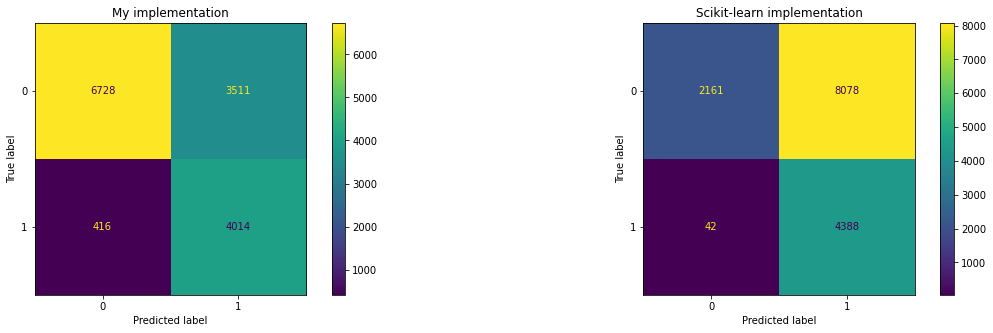

In [33]:
scores(y_pred1, y_pred2, target_test)

In [34]:
with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(classifier.best_params_, f)

### Logistic Regression (Логистическая регрессия)

In [35]:
classifier = GridSearchCV(Pipeline([("LogReg", LogisticRegressionClassifier())]),
                   {"LogReg__lr" : [0.01, 0.005, 0.001],
                    "LogReg__max_iters" : [100, 200, 500, 2000],
                    "LogReg__fit_intercept" : [True, False]})
classifier.fit(data_train, target_train)
y_pred1 = classifier.best_estimator_.predict(data_test)
print("Лучшие гиперпараметры модели:", classifier.best_params_)
print("Лучший счёт модели:", classifier.best_score_)

Лучшие гиперпараметры модели: {'LogReg__fit_intercept': True, 'LogReg__lr': 0.01, 'LogReg__max_iters': 2000}
Лучший счёт модели: 0.7958569356480151


In [36]:
model = LogisticRegression(max_iter = 2000)
model.fit(data_train, target_train)
y_pred2 = model.predict(data_test)

Accuracy: 0.7932374394982616
Accuracy sklearn model: 0.798145749539846
Recall: 0.6395033860045146
Recall sklearn model: 0.798145749539846
Precision: 0.575310193183603
Precision sklearn model: 0.798145749539846


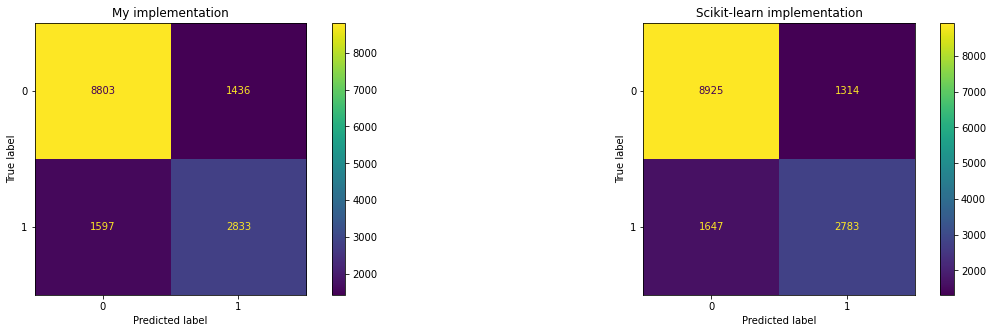

In [37]:
scores(y_pred1, y_pred2, target_test)

In [38]:
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(classifier.best_params_, f)

### SVM (Метод опорных векторов)

In [39]:
classifier = GridSearchCV(Pipeline([("SVM", SVMClassifier())]),
                   {"SVM__epoches" : [10, 50, 100],
                    "SVM__lr" : [0.01, 0.05, 0.0001],
                    "SVM__alpha" : [2.0, 1.0, 0.1, 0.01, 0.0]})
classifier.fit(data_train, np.where(target_train > 0, 1, -1))
y_pred1 = classifier.best_estimator_.predict(data_test)
y_pred1 = np.where(y_pred1 > 0, 1, 0)
print("Лучшие гиперпараметры модели:", classifier.best_params_)
print("Лучший счёт модели:", classifier.best_score_)

Лучшие гиперпараметры модели: {'SVM__alpha': 0.1, 'SVM__epoches': 50, 'SVM__lr': 0.0001}
Лучший счёт модели: 0.7896920863825191


In [40]:
model = SVC(kernel = "linear")
model.fit(data_train, target_train)
y_pred2 = model.predict(data_test)

Accuracy: 0.7871020519462812
Accuracy sklearn model: 0.7877837616742791
Recall: 0.6557562076749436
Recall sklearn model: 0.7877837616742791
Precision: 0.575310193183603
Precision sklearn model: 0.7877837616742791


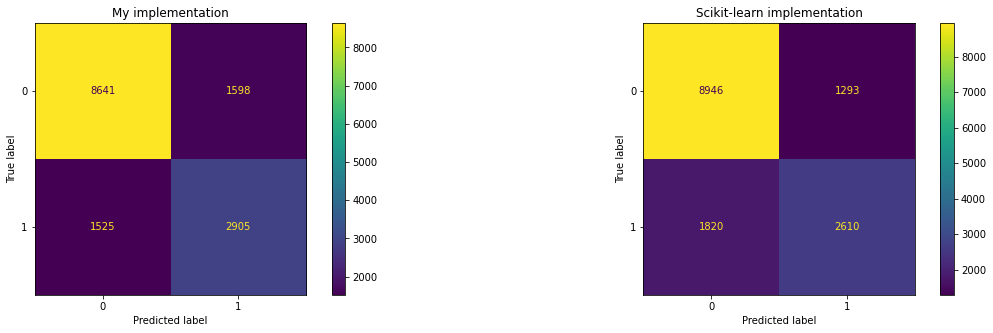

In [41]:
scores(y_pred1, y_pred2, target_test)

In [42]:
with open('SVM.pickle', 'wb') as f:
    pickle.dump(classifier.best_params_, f)

### KNN (Метод k-ближайших соседей)

In [43]:
classifier = GridSearchCV(Pipeline([("KNN", KNNClassifier(nb=5))]), {"KNN__nb" : [7, 5, 3, 1]})
classifier.fit(data_train, target_train)
y_pred1 = classifier.best_estimator_.predict(data_test)
print("Лучшие гиперпараметры модели:", classifier.best_params_)
print("Лучший счёт модели:", classifier.best_score_)

Лучшие гиперпараметры модели: {'KNN__nb': 7}
Лучший счёт модели: 0.8100567189640312


In [44]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(data_train, target_train)
y_pred2 = model.predict(data_test)

Accuracy: 0.8123934828550003
Accuracy sklearn model: 0.8087804212966119
Recall: 0.6544018058690745
Recall sklearn model: 0.8087804212966119
Precision: 0.575310193183603
Precision sklearn model: 0.8087804212966119


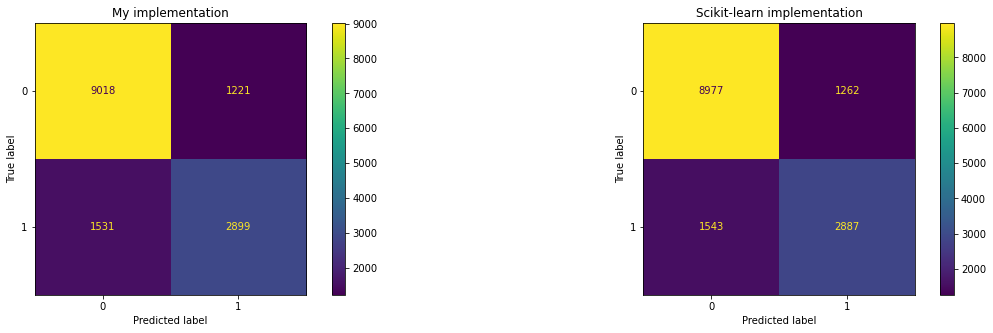

In [45]:
scores(y_pred1, y_pred2, target_test)

In [46]:
with open('KNN.pickle', 'wb') as f:
    pickle.dump(classifier.best_params_, f)

### Naive Bayes (Наивный байесовский классификатор)

In [47]:
classifier = NaiveBayesClassifier()
classifier.fit(data_train, target_train)
y_pred1 = classifier.predict(data_test)

In [48]:
model = GaussianNB()
model.fit(data_train, target_train)
y_pred2 = model.predict(data_test)

Accuracy: 0.7633785534119572
Accuracy sklearn model: 0.7535619333287886
Recall: 0.82686230248307
Recall sklearn model: 0.7535619333287886
Precision: 0.575310193183603
Precision sklearn model: 0.7535619333287886


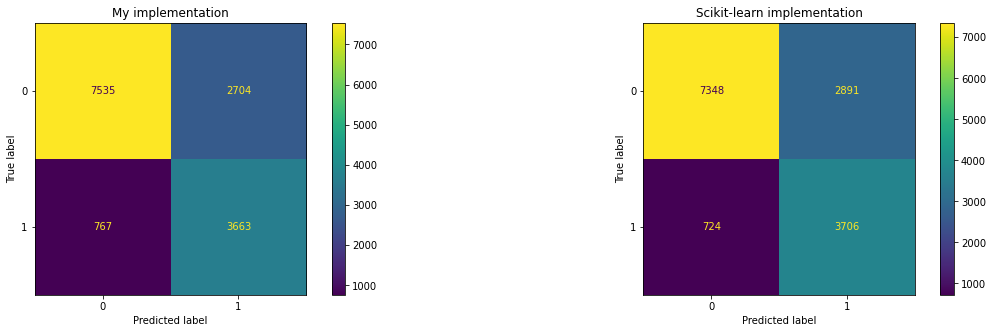

In [49]:
scores(y_pred1, y_pred2, target_test)